In [68]:

import pandas as pd
import numpy as np

In [69]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [70]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [71]:

df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [72]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [73]:

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [75]:

clf = DecisionTreeClassifier()


In [76]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [77]:

accuracy_score(y_test,y_pred)

0.6293706293706294

In [78]:

np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6316901408450704

## Using Binning ##

In [109]:

kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [110]:
t1 = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])
xtrain=t1.fit_transform(X_train)
xtest=t1.transform(X_test)

In [111]:

output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':xtrain[:,0],
    'fare':X_train['Fare'],
    'fare_trf':xtrain[:,1]
})

In [112]:
output

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [113]:

clf2 = DecisionTreeClassifier()
clf2.fit(xtrain,y_train)

DecisionTreeClassifier()

In [114]:
pred2=clf2.predict(xtest)

In [115]:
accuracy_score(pred2,y_test)

0.6223776223776224

In [116]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6359154929577465


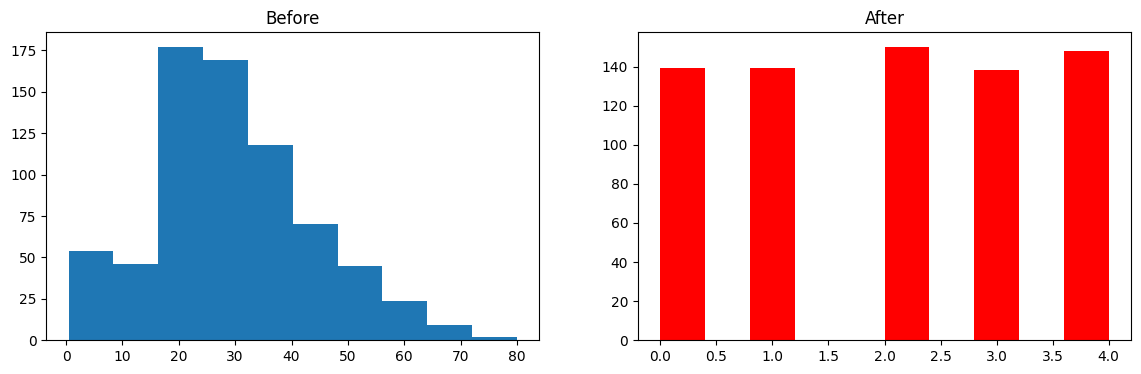

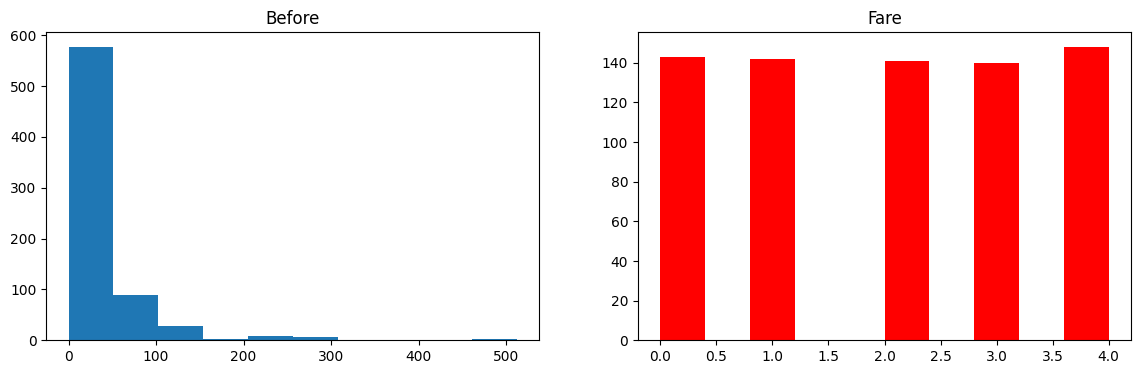

In [123]:

discretize(5,'quantile')